### KL Divergence

$Q$ distribution is the reference.

$D_{\mathrm{KL}}(P||Q)$: How different $P$ is against $Q$

$$
D_{\mathrm{KL}}(P||Q) = \sum_{x\in\chi} P(x) \log\left(\frac{P(x)}{Q(x)}\right)
$$

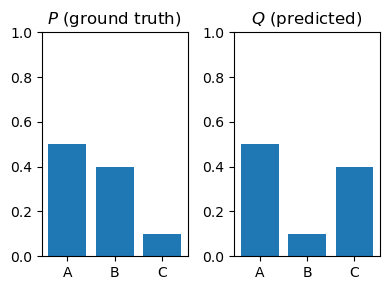

In [209]:
import numpy as np
import matplotlib.pyplot as plt

P = np.array([.5, .4, .1])
Q = np.array([.5, .1, .4])

fig, ax = plt.subplots(1,2,figsize=(4,3))

ax[0].set_title('$P$ (ground truth)')
ax[0].bar(list('ABC'), P)
ax[0].set_ylim(0,1)

ax[1].set_title('$Q$ (predicted)')
ax[1].bar(list('ABC'), Q)
ax[1].set_ylim(0,1)

plt.tight_layout()
plt.show()

In [210]:
kl = np.sum(P * np.log(P/Q)) # weighted average with respective to the porportion of dist P (ground truth) 
print(kl)

0.4158883083359671


$$
D_{\mathrm{KL}}(P||Q) = \int_{-\infty}^{\infty} p(x) \log \left( \frac{p(x)}{q(x)} \right) dx
$$

In [211]:
from ipywidgets import interactive
from scipy.stats import norm


def plot(mu=-6, sigma=1):
    fig, ax = plt.subplots(2,1,figsize=(6,4))

    x = np.linspace(-10, 10, 2001)

    P = norm.pdf(x)
    Q = norm.pdf(x, loc=mu, scale=sigma)

    f = P * np.log(P/Q)
    kl = (f * 0.01).sum()

    ax[0].plot(x, P, label="$P$")
    ax[0].plot(x, Q, label="$Q$")
    ax[0].set_xlim(-10, 10)
    ax[0].legend(loc='upper right')
    ax[0].set_title(r"$D_{\mathrm{KL}}(P||Q) = $" + f"{kl:.5f}")

    ax[1].plot(x, f, label=r"$p(x)\ \log\left(\dfrac{p(x)}{q(x)}\right)$")
    ax[1].set_xlim(-10, 10)
    ax[1].axhline(0, lw=1, c='grey')
    m = np.abs(f).max() * 1.1
    if m != 0:
        ax[1].set_ylim(-m,m)
    ax[1].legend(loc='lower right')

    fig.gca().yaxis.set_major_formatter("{:.1f}".format)
    fig.tight_layout()
    plt.show()

interactive(plot, mu=(-6,6,.1), sigma=(1,2,.1))

interactive(children=(FloatSlider(value=-6.0, description='mu', max=6.0, min=-6.0), FloatSlider(value=1.0, des…

In [245]:
from collections import deque
from ipywidgets import interactive
from scipy.stats import norm

history = deque(maxlen=100)
prev_setting = None

def plot(Q_mu=-10, Q_sigma=1, P1_mu=-2, P1_sigma=1, P2_mu=4, P2_sigma=2, P_ratio=.5):

    global prev_setting
    if prev_setting != (Q_sigma, P1_mu, P1_sigma, P2_mu, P2_sigma, P_ratio):
        prev_setting = (Q_sigma, P1_mu, P1_sigma, P2_mu, P2_sigma, P_ratio)
        history.clear()

    fig, ax = plt.subplots(3,1,figsize=(8,8))

    x = np.linspace(-20, 20, 4001)

    P = norm.pdf(x, P1_mu, P1_sigma)*P_ratio + norm.pdf(x, P2_mu, P2_sigma)*(1-P_ratio)
    Q = norm.pdf(x, loc=Q_mu, scale=Q_sigma)

    f = P * np.log(P/Q)
    kl = (f * 0.01).sum()

    ax[0].plot(x, P, label=rf"$P \sim {P_ratio:.1f} N({P1_mu:.1f},{P2_sigma:.1f}^2) + {1-P_ratio:.1f} N({P2_mu:.1f},{P2_sigma:.1f}^2)$")
    ax[0].plot(x, Q, label=rf"$Q \sim N({Q_mu:.1f},{Q_sigma:.1f}^2)$")
    ax[0].set_xlim(-10, 10)
    ax[0].legend(loc='upper right')
    ax[0].set_title(r"$D_{\mathrm{KL}}(P||Q) = $" + f"{kl:.5f}")

    ax[1].plot(x, f, label=r"$p(x)\ \log\left(\dfrac{p(x)}{q(x)}\right)$")
    ax[1].set_xlim(-10, 10)
    ax[1].axhline(0, lw=1, c='grey')
    m = np.abs(f).max() * 1.1
    if m != 0:
        ax[1].set_ylim(-m,m)
    ax[1].legend(loc='lower right')

    history.append([Q_mu, kl])
    a = np.array(history)
    ax[2].plot(*a[a[:,0].argsort()].T, marker='.', alpha=.4)
    ax[2].scatter(*a[np.argmin(a[:,1])], marker='X', c='r', label=a[np.argmin(a[:,1])])
    ax[2].set_xlim(-10, 10)
    ax[2].set_ylim(-1)
    ax[2].legend()

    ax[0].yaxis.set_major_formatter("{:.1f}".format)
    ax[1].yaxis.set_major_formatter("{:.1f}".format)
    ax[2].yaxis.set_major_formatter("{:.1f}".format)
    
    fig.tight_layout()
    plt.show()

interactive(plot, Q_mu=(-10,10,.1), Q_sigma=(1,4,.1), P1_mu=(-10,10,.1), P1_sigma=(1,4,.1), P2_mu=(-10,10,.1), P2_sigma=(1,4,.1), P_ratio=(0,1,.1))

interactive(children=(FloatSlider(value=-10.0, description='Q_mu', max=10.0, min=-10.0), FloatSlider(value=1.0…